# Multi-Part Ocean Regression - Dropout Test

In [1]:
#Data Processing and Management
import os
import glob
import csv
import pandas as pd
import numpy as np
import math

#ML Model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

#Model and Data Analysis
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#Imaging and Plotting
import matplotlib.pyplot as plt

### Import Data

In [2]:
path = PATH


#Pull in Wavenumbers for Plotting
wavenumbers = pd.read_csv(path + '//'+'Wavenumbers.csv')
#Pull in water references
water =pd.read_csv(path + '//'+'Water.csv')


#Field Samples with Spikes
F_Dataset = pd.read_csv(path + '//'+'F_Dataset.csv')
F_Concs = pd.read_csv(path + '//'+'Ocean_ML_Concs_F_Samples.csv')
F_Concs.drop(columns=F_Concs.columns[0], axis=1, inplace=True)
#Field Samples Without Spikes
Field_Samples = pd.read_csv(path + '//'+'Field_Samples.csv')
Field_Concs = pd.read_csv(path + '//'+'Ocean_ML_Concs_FIELD.csv')
Field_Concs.drop(columns=Field_Concs.columns[0], axis=1, inplace=True)
Field_Concs = Field_Concs.T
Field_Concs.reset_index(drop=True, inplace=True)

# Preprocessing

In [3]:
#Field Samples w/ Spikes
avg = F_Dataset.iloc[500:800,:].mean()
F_Dataset.iloc[0:1000,:] = F_Dataset.iloc[0:1000,:] - avg
F_Dataset = F_Dataset/F_Dataset.iloc[1100,:]

#Field Samples w/o Spikes
avg = Field_Samples.iloc[500:800,:].mean()
Field_Samples.iloc[0:1000,:] = Field_Samples.iloc[0:1000,:] - avg
Field_Samples = Field_Samples/Field_Samples.iloc[1100,:]

In [4]:
drop_lists=[['F_A1', 'F_A2', 'F_A3', 'F_A4', 'F_A5', 'F_A7', 'F_A8', 'F_A9', 'F_A10', 'F_A11'],['F_B1', 'F_B2', 'F_B3', 'F_B4', 'F_B5', 'F_B7', 'F_B8', 'F_B9', 'F_B10', 'F_B11'],['F_C1', 'F_C2', 'F_C3', 'F_C4', 'F_C5', 'F_C7', 'F_C8', 'F_C9', 'F_C10', 'F_C11'],['F_D1', 'F_D2', 'F_D3', 'F_D4', 'F_D5', 'F_D7', 'F_D8', 'F_D9', 'F_D10', 'F_D11'],['F_E1', 'F_E2', 'F_E3', 'F_E4', 'F_E5', 'F_E7', 'F_E8', 'F_E9', 'F_E10'],['F_F1', 'F_F2', 'F_F3', 'F_F4', 'F_F5', 'F_F7', 'F_F8', 'F_F9', 'F_F10'], ['F_G1', 'F_G2', 'F_G3', 'F_G4', 'F_G5', 'F_G7', 'F_G8', 'F_G9', 'F_G10', 'F_G11'], ['F_H1', 'F_H2', 'F_H3', 'F_H4', 'F_H5', 'F_H7', 'F_H8', 'F_H9', 'F_H10', 'F_H11'], ['F_I1', 'F_I2', 'F_I3', 'F_I4', 'F_I5', 'F_I7', 'F_I8', 'F_I9', 'F_I10', 'F_I11'], ['F_J1', 'F_J2', 'F_J3', 'F_J4', 'F_J5', 'F_J7', 'F_J8', 'F_J9', 'F_J10', 'F_J11']]
field_names = ['F_A6','F_B6','F_C6','F_D6','F_E6','F_F6','F_G6','F_H6','F_I6','F_J6']

### Glycine

In [5]:
# train test data split
X_train, X_test, y_train, y_test = train_test_split(F_Dataset.T, F_Concs.T, test_size=0.3, random_state=42)
# initialize regressor & fit
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train[0])
# Estimate Field Sample
y_un_pred_GLY_no_Drop = regressor.predict(Field_Samples.T) # predict on new data

In [6]:
glycine_results = pd.DataFrame({'Glycine True':Field_Concs[0], 'Glycine No Drop': y_un_pred_GLY_no_Drop})

In [7]:
glycine_preds = []
counter = 0

In [8]:
for i in drop_lists:
    #Drop Data
    F_Dataset_temp = F_Dataset.drop(i, axis = 1)
    F_Conc_temp = F_Concs.drop(i, axis = 1)
    # train test data split
    X_train, X_test, y_train, y_test = train_test_split(F_Dataset_temp.T, F_Conc_temp.T, test_size=0.3, random_state=42)
    # initialize regressor & fit
    regressor = SVR(kernel='rbf')
    regressor.fit(X_train,y_train[0])
    # Estimate Field Sample
    y_un_pred_GLY = regressor.predict(Field_Samples.T) # predict on new data
    glycine_preds.append(y_un_pred_GLY[counter])
    counter = counter +1

In [9]:
glycine_results['Glycine Predicted'] = glycine_preds

In [10]:
glycine_results['Glycine Diff'] = glycine_results['Glycine Predicted'] - glycine_results['Glycine True']

In [11]:
#Glycine (GLY)
GLY_20 = (max(glycine_results['Glycine True'])/10)*2
#print(GLY_10)
GLY_20_count = 0
for i in glycine_results['Glycine Diff']:
    if ((i <= GLY_20) and (i >= -GLY_20)):
        GLY_20_count = GLY_20_count +1
print("Glycine:  " + str(GLY_20_count))

Glycine:  7


In [12]:
glycine_results

,Glycine True,Glycine No Drop,Glycine Predicted,Glycine Diff
0,5.894919,4.532170,4.645560,-1.249359
1,5.711435,4.719835,4.771531,-0.939903
2,5.609846,4.643008,4.735418,-0.874427
3,5.517563,4.548832,4.630389,-0.887174
4,6.208532,4.572505,4.627640,-1.580892
5,5.751254,4.944449,5.004629,-0.746625
6,5.762269,4.535750,4.641267,-1.121002
7,5.932998,4.789889,4.775115,-1.157883
8,5.669104,4.607874,4.669610,-0.999494
9,6.070126,4.542376,4.532696,-1.537430


(-10.0, 10.0)

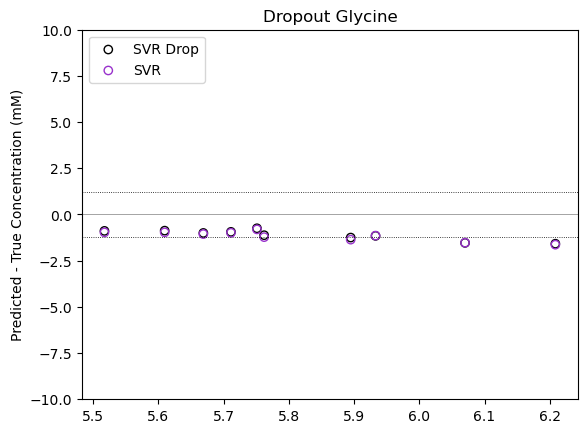

In [13]:
plt.scatter(glycine_results['Glycine True'], glycine_results['Glycine Diff'],  marker = 'o', facecolors='none', color = 'k', label='SVR Drop')
plt.scatter(glycine_results['Glycine True'], glycine_results['Glycine No Drop']-glycine_results['Glycine True'] ,  marker = 'o', facecolors='none', color = 'darkorchid', label='SVR')
plt.axhline((glycine_results['Glycine True'].max()/10)*2, color = 'k', linewidth = 0.6, linestyle = ':')
plt.axhline(0, color = 'grey', linewidth = 0.5)
plt.axhline(-(glycine_results['Glycine True'].max()/10)*2, color = 'k', linewidth = 0.6, linestyle = ':')
plt.title('Dropout Glycine')
plt.ylabel('Predicted - True Concentration (mM)')
plt.legend(frameon = True, loc='upper left')
plt.ylim(-10,10)
#plt.xlabel('True Concentration (mM)')

###  Butyric Acid

In [14]:
# train test data split
X_train, X_test, y_train, y_test = train_test_split(F_Dataset.T, F_Concs.T, test_size=0.3, random_state=42)
# initialize regressor & fit
regressor = GradientBoostingRegressor(loss = 'squared_error',n_estimators=100, learning_rate=0.5, max_depth=1, random_state=42)
regressor.fit(X_train,y_train[1])
# Estimate Field Sample
y_un_pred_BUT_no_Drop_GBR = regressor.predict(Field_Samples.T) # predict on new data

In [15]:
# train test data split
X_train, X_test, y_train, y_test = train_test_split(F_Dataset.T, F_Concs.T, test_size=0.3, random_state=42)
# initialize regressor & fit
regressor = HistGradientBoostingRegressor(random_state = 42)
regressor.fit(X_train,y_train[1])
# Estimate Field Sample
y_un_pred_BUT_no_Drop_HGBR = regressor.predict(Field_Samples.T) # predict on new data

In [16]:
# train test data split
X_train, X_test, y_train, y_test = train_test_split(F_Dataset.T, F_Concs.T, test_size=0.3, random_state=42)
# initialize regressor & fit
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train[1])
# Estimate Field Sample
y_un_pred_BUT_no_Drop_SVR= regressor.predict(Field_Samples.T) # predict on new data

In [17]:
butyric_acid_results = pd.DataFrame({'Butyric Acid True':Field_Concs[1], 'Butyric Acid No Drop SVR':y_un_pred_BUT_no_Drop_SVR, 'Butyric Acid No Drop GBR':y_un_pred_BUT_no_Drop_GBR , 'Butyric Acid No Drop HGBR':y_un_pred_BUT_no_Drop_HGBR })

In [18]:
butyric_acid_preds_SVR = []
counter = 0

In [19]:
for i in drop_lists:
    #Drop Data
    F_Dataset_temp = F_Dataset.drop(i, axis = 1)
    F_Conc_temp = F_Concs.drop(i, axis = 1)
    # train test data split
    X_train, X_test, y_train, y_test = train_test_split(F_Dataset_temp.T, F_Conc_temp.T, test_size=0.3, random_state=42)
    # initialize regressor & fit
    regressor = SVR(kernel='rbf')
    regressor.fit(X_train,y_train[1])
    # Estimate Field Sample
    y_un_pred_BUT = regressor.predict(Field_Samples.T) # predict on new data
    butyric_acid_preds_SVR.append(y_un_pred_BUT[counter])
    counter = counter +1

In [20]:
butyric_acid_results['Butyric Acid Drop SVR'] = butyric_acid_preds_SVR

In [21]:
butyric_acid_results['Butyric Acid Drop SVR Diff'] = butyric_acid_results['Butyric Acid Drop SVR'] - butyric_acid_results['Butyric Acid True']

In [22]:
#Butyric Acid (BUT)
BUT_20 = (max(butyric_acid_results['Butyric Acid True'])/10)*2
GLU_20_count = 0
for i in butyric_acid_results['Butyric Acid Drop SVR Diff']:
    if ((i <= BUT_20) and (i >= -BUT_20)):
        GLU_20_count = GLU_20_count +1
print("Butyric Acid (SVR) :  " + str(GLU_20_count))

Butyric Acid (SVR) :  9


In [23]:
butyric_acid_preds_GBR = []
counter = 0

In [24]:
for i in drop_lists:
    #Drop Data
    F_Dataset_temp = F_Dataset.drop(i, axis = 1)
    F_Conc_temp = F_Concs.drop(i, axis = 1)
    # train test data split
    X_train, X_test, y_train, y_test = train_test_split(F_Dataset_temp.T, F_Conc_temp.T, test_size=0.3, random_state=42)
    # initialize regressor & fit
    regressor = GradientBoostingRegressor(loss = 'squared_error',n_estimators=100, learning_rate=0.5, max_depth=1, random_state=42)
    regressor.fit(X_train,y_train[1])
    # Estimate Field Sample
    y_un_pred_BUT = regressor.predict(Field_Samples.T) # predict on new data
    butyric_acid_preds_GBR.append(y_un_pred_BUT[counter])
    counter = counter +1

In [25]:
butyric_acid_results['Butyric Acid Drop GBR'] = butyric_acid_preds_GBR

In [26]:
butyric_acid_results['Butyric Acid Drop GBR Diff'] = butyric_acid_results['Butyric Acid Drop GBR'] - butyric_acid_results['Butyric Acid True']

In [27]:
#Butyric Acid (BUT)
BUT_20 = (max(butyric_acid_results['Butyric Acid True'])/10)*2
GLU_20_count = 0
for i in butyric_acid_results['Butyric Acid Drop GBR Diff']:
    if ((i <= BUT_20) and (i >= -BUT_20)):
        GLU_20_count = GLU_20_count +1
print("Butyric Acid :  " + str(GLU_20_count))

Butyric Acid :  8


In [28]:
butyric_acid_preds_HGBR = []
counter = 0

In [29]:
for i in drop_lists:
    #Drop Data
    F_Dataset_temp = F_Dataset.drop(i, axis = 1)
    F_Conc_temp = F_Concs.drop(i, axis = 1)
    # train test data split
    X_train, X_test, y_train, y_test = train_test_split(F_Dataset_temp.T, F_Conc_temp.T, test_size=0.3, random_state=42)
    # initialize regressor & fit
    regressor = HistGradientBoostingRegressor(random_state = 42)
    regressor.fit(X_train,y_train[1])
    # Estimate Field Sample
    y_un_pred_BUT = regressor.predict(Field_Samples.T) # predict on new data
    butyric_acid_preds_HGBR.append(y_un_pred_BUT[counter])
    counter = counter +1

In [30]:
butyric_acid_results['Butyric Acid Drop HGBR'] = butyric_acid_preds_HGBR

In [31]:
butyric_acid_results['Butyric Acid Drop HGBR Diff'] = butyric_acid_results['Butyric Acid Drop HGBR'] - butyric_acid_results['Butyric Acid True']

In [32]:
#Butyric Acid (BUT)
BUT_20 = (max(butyric_acid_results['Butyric Acid True'])/10)*2
GLU_20_count = 0
for i in butyric_acid_results['Butyric Acid Drop HGBR Diff']:
    if ((i <= BUT_20) and (i >= -BUT_20)):
        GLU_20_count = GLU_20_count +1
print("Butyric Acid :  " + str(GLU_20_count))

Butyric Acid :  7


In [33]:
butyric_acid_results

,Butyric Acid True,Butyric Acid No Drop SVR,Butyric Acid No Drop GBR,Butyric Acid No Drop HGBR,Butyric Acid Drop SVR,Butyric Acid Drop SVR Diff,Butyric Acid Drop GBR,Butyric Acid Drop GBR Diff,Butyric Acid Drop HGBR,Butyric Acid Drop HGBR Diff
0,26.80909,20.116590,22.501136,19.775995,21.567751,-5.241339,21.790018,-5.019072,19.980308,-6.828782
1,22.23011,20.637514,20.492352,20.144361,21.058315,-1.171795,16.792635,-5.437475,18.398603,-3.831507
2,26.26218,20.444665,14.312612,16.715888,20.089588,-6.172592,4.425222,-21.836958,9.226060,-17.036120
3,21.82159,20.157581,21.465941,37.507306,20.646065,-1.175525,24.128071,2.306481,37.742693,15.921103
4,48.10749,20.220389,52.767911,40.982101,19.751235,-28.356255,71.169886,23.062396,46.664618,-1.442872
5,25.90916,21.237520,30.174143,22.584980,20.669599,-5.239561,20.719461,-5.189699,18.602164,-7.306996
6,23.30520,20.137138,20.109770,14.378512,19.872291,-3.432909,19.699598,-3.605602,18.596317,-4.708883
7,21.71587,20.798258,23.627359,17.761081,20.452943,-1.262927,26.058782,4.342912,26.268328,4.552458
8,24.81893,20.346393,18.935234,17.400239,20.001916,-4.817014,18.164562,-6.654368,12.872835,-11.946095
9,21.91971,20.133696,26.454348,19.730987,21.110525,-0.809185,25.737638,3.817928,19.281049,-2.638661


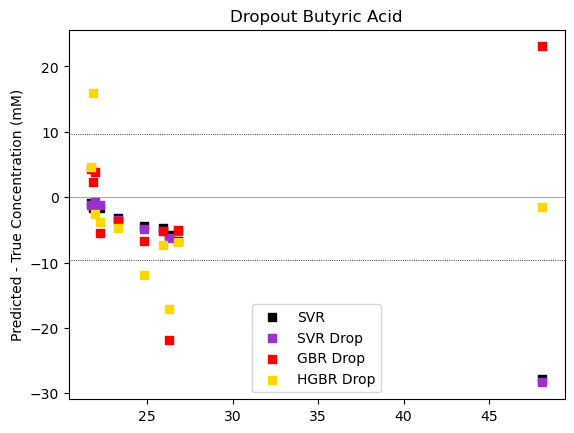

In [34]:
plt.scatter(butyric_acid_results['Butyric Acid True'], butyric_acid_results['Butyric Acid No Drop SVR']-butyric_acid_results['Butyric Acid True'],  marker = 's', color = 'k', label='SVR')
plt.scatter(butyric_acid_results['Butyric Acid True'], butyric_acid_results['Butyric Acid Drop SVR']-butyric_acid_results['Butyric Acid True'],  marker = 's', color = 'darkorchid', label='SVR Drop')
plt.scatter(butyric_acid_results['Butyric Acid True'], butyric_acid_results['Butyric Acid Drop GBR']-butyric_acid_results['Butyric Acid True'],  marker = 's', color = 'r', label='GBR Drop')
plt.scatter(butyric_acid_results['Butyric Acid True'], butyric_acid_results['Butyric Acid Drop HGBR']-butyric_acid_results['Butyric Acid True'],  marker = 's', color = 'gold', label='HGBR Drop')

plt.axhline((butyric_acid_results['Butyric Acid True'].max()/10)*2, color = 'k', linewidth = 0.6, linestyle = ':')
plt.axhline(0, color = 'grey', linewidth = 0.5)
plt.axhline(-(butyric_acid_results['Butyric Acid True'].max()/10)*2, color = 'k', linewidth = 0.6, linestyle = ':')
plt.title('Dropout Butyric Acid')
plt.ylabel('Predicted - True Concentration (mM)')
plt.legend(frameon = True)

#plt.xlabel('True Concentration (mM)')

### Glucose

In [35]:
# train test data split
X_train, X_test, y_train, y_test = train_test_split(F_Dataset.T, F_Concs.T, test_size=0.3, random_state=42)
# initialize regressor & fit
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train[2])
# Estimate Field Sample
y_un_pred_GLU_no_Drop = regressor.predict(Field_Samples.T) # predict on new data

In [36]:
glucose_results = pd.DataFrame({'Glucose True':Field_Concs[2], 'Glucose No Drop':y_un_pred_GLU_no_Drop})

In [37]:
glucose_preds = []
counter = 0

In [38]:
for i in drop_lists:
    #Drop Data
    F_Dataset_temp = F_Dataset.drop(i, axis = 1)
    F_Conc_temp = F_Concs.drop(i, axis = 1)
    # train test data split
    X_train, X_test, y_train, y_test = train_test_split(F_Dataset_temp.T, F_Conc_temp.T, test_size=0.3, random_state=42)
    # initialize regressor & fit
    regressor = GradientBoostingRegressor(loss = 'squared_error',n_estimators=100, learning_rate=0.5, max_depth=1, random_state=42)
    regressor.fit(X_train,y_train[1])
    # Estimate Field Sample
    y_un_pred_GLU = regressor.predict(Field_Samples.T) # predict on new data
    glucose_preds.append(y_un_pred_GLU[counter])
    counter = counter +1

In [39]:
glucose_results['Glucose Predicted'] = glucose_preds

In [40]:
glucose_results['Glucose Diff'] = glucose_results['Glucose Predicted'] - glucose_results['Glucose True']

In [41]:
#Glucose (GLU)
GLU_20 = (max(glucose_results['Glucose True'])/10)*2
print(GLU_20)
GLU_20_count = 0
for i in glucose_results['Glucose Diff']:
    if ((i <= GLU_20) and (i >= -GLU_20)):
        GLU_20_count = GLU_20_count +1
print("Glucose :  " + str(GLU_20_count))

8.113855782
Glucose :  4


Text(0.5, 0, 'True Concentration (mM)')

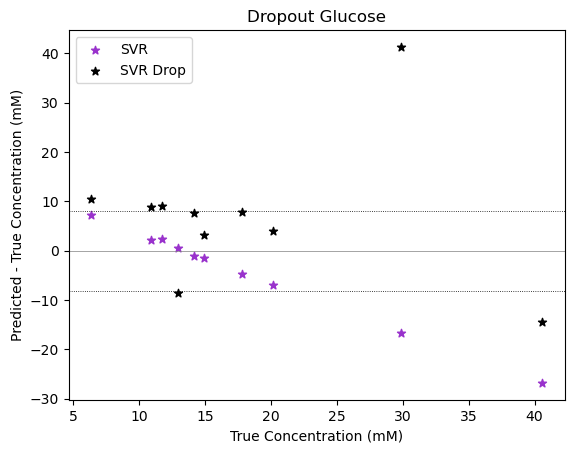

In [42]:
plt.scatter(glucose_results['Glucose True'], glucose_results['Glucose No Drop']-glucose_results['Glucose True'], color = 'darkorchid', marker = '*', label='SVR')
plt.scatter(glucose_results['Glucose True'], glucose_results['Glucose Diff'], color = 'k', marker = '*', label='SVR Drop')
plt.axhline((glucose_results['Glucose True'].max()/10)*2, color = 'k', linewidth = 0.6, linestyle = ':')
plt.axhline(0, color = 'grey', linewidth = 0.5)
plt.axhline(-(glucose_results['Glucose True'].max()/10)*2, color = 'k', linewidth = 0.6, linestyle = ':')
plt.legend(loc='upper left')
plt.title('Dropout Glucose')
plt.ylabel('Predicted - True Concentration (mM)')
plt.xlabel('True Concentration (mM)')

In [43]:
glucose_results

,Glucose True,Glucose No Drop,Glucose Predicted,Glucose Diff
0,14.202624,13.116223,21.790018,7.587394
1,6.370760,13.582554,16.792635,10.421875
2,12.952698,13.406011,4.425222,-8.527476
3,20.186807,13.152176,24.128071,3.941264
4,29.845762,13.206486,71.169886,41.324124
5,11.744491,14.131122,20.719461,8.974970
6,10.935027,13.130576,19.699598,8.764571
7,40.569279,13.742182,26.058782,-14.510496
8,14.896405,13.315844,18.164562,3.268158
9,17.815518,13.134474,25.737638,7.922119
